# **Project 1: Bandit problem**

> -  Developer: Shaun Pritchard
- Date: Feb 6, 2022
- Class: CAP 6629: Reinforcement Learning
- Prof. Ni, Zehn

**References:**
- [1] Sutton, Richard S. and Barto, Andrew G. Chapter 2: Multi-Armed Bandits from Reinforcement Learning. pps. 25-46. Kindle Edition. 2018.
- [2] Ni, Zhen. Multi-Armed Bandits. Lecture notes. pps. 8, 10. 2022.


## **Objective:**

- **Part 1:** Read chapter 2 and use any programming language to implement a multi-arm Bandit problem. Using the reward distribution for each action q*(a) as shown in lecture notespage 10.

- **Part 2:** Apply the algorithm in part 1 to a provided Ad dataset to determine frequncy  of selcted ads and test greedy and ϵ-greedy parameters. 
- **Part 3:** Analyze and compare results then publish to PDF.



## **Test and Parameters**

With four different epsilon values, we will perform multi K-Armed Bandit experiments. Our objectives are to perform 2000 -3000 iterations with 10000 timesteps each compared to the following random, greedy and ϵ-greedy parameters.

- ϵ=1 
- ϵ=0.1
- ϵ=0.01
- ϵ=0  

> ϵ=1  is a complatley randomm agent, ϵ=0.1 is the ϵ-greedy implementation at value 0.1, ϵ=0.01 is the ϵ-greedy implementation at value 0.01, ϵ=0 is the reward values averaged over N iterations for each timestep, and then plotted.


**Pseudo Code K-armed bandits Algorithm**

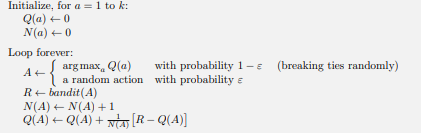

## **Importing the libraries**

In [2]:
# Import libairies
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import cm
import pandas as pd
import random

## Importing the dataset

In [3]:
# Import data For K-armed bandit problem part 2
df = pd.read_csv('/content/Ads_Optimisation.csv')
df.head(5) # validate data import

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0


## Global Variables

In [63]:
Q = np.zeros(10) # Initialize q-value array
N = np.zeros(10) # Initialize counting array to track each action
i = 2000 # itterations
s = 1000 # Steps in (t)

# **Part 1**

> Follow the algorithm pseudo code (page 8 of lecture note). The reward distributions are 
provided on page 10 and you need to estimate the mean value of each action yourself. Please show 1) 
your average reward curves of different \epsilon values; and 2) percent of optimal actions (similar 
figures as we studied in the class).  

-  Use 2000 or 3000 for your iteration 
- Compare the 
trajectories of \epsilon =0.1 and \epsilon=0.01 over time

### **Algorithm 1**
The kArmedBandit Algorithm takes the mean reward distribution for each given action A, returns R from the normal reward distribution of A, and then updates N and Q values according to the normal reward distribution with mean q*(a).

In [5]:
# Calculate the mean of the reward distribution for each action q*(a)
# Aquired from Ni, Zhen. Multi-Armed Bandits. Lecture notes. pps. 8, 10. 2022.
_q = np.array((0.2, -1, 2.5, 0.6, 2, -1.7, -0.2, -1, 1, -0.3))                                                          

In [64]:
# K-Arm Bandit Algorithm
def kArmedBandit(itter, step_t, e_greedy):

    Matrix_R = np.zeros((itter, step_t))
    
    for i in range(0, itter):                
        for a in range(0, 10): # Initialize 0 to 10 reset
            Q[a]=0 # Initialze Q array to 0
            N[a]=0 # Initialze N array to 0
        sum_R=0 # Initialze variable to 0
        for j in range(0, step_t):            
            n = random.random() # Return the next random number in range
            if n < 1 - e_greedy: # Exploit data with probability 1 - e_greedy
                A = np.random.choice(np.flatnonzero(Q == Q.max())) # Random sample of Q-Max Array
                R = np.random.normal(_q[A], 1) # Expected reward values array
                N[A] +=1  # Update array N(A) <-- N(A)-1
                Q[A] += 1/N[A]*(R-Q[A]) # Action value                
                sum_R += Q[A]  # Sum of action value rewards             
                Matrix_R[i][j]=sum_R/(j+1) # Average reward values matrix

            else: # Explore data randomly
                A = np.random.randint(0, 10) # Randomize next action             
                R = np.random.normal(_q[A], 1) # Expected reward values array
                N[A] +=1 # Update array N(A) <-- N(A)-1
                Q[A] += 1/N[A]*(R-Q[A]) # Action value                 
                sum_R += Q[A]  # Sum of action value rewards                 
                Matrix_R[i][j] = sum_R/(j+1) # Average reward values matrix

    return Matrix_R 	

In [65]:
# Compare the trajectories of \epsilon =0.1 and \epsilon=0.01 over time. 
e_1 =  kArmedBandit(i, s, 1)
e_01 = kArmedBandit(i, s, 0.1)
e_001 = kArmedBandit(i, s, 0.01)
e_reward = kArmedBandit(i, s, 0)

In [66]:
# Average results of compared epsilon trajectories
e_avg_1 = np.mean(e_1, axis=0)
e_avg_01= np.mean(e_01, axis=0)
e_avg_001 =np.mean(e_001, axis=0)
avg_rewards =np.mean(e_reward, axis=0)

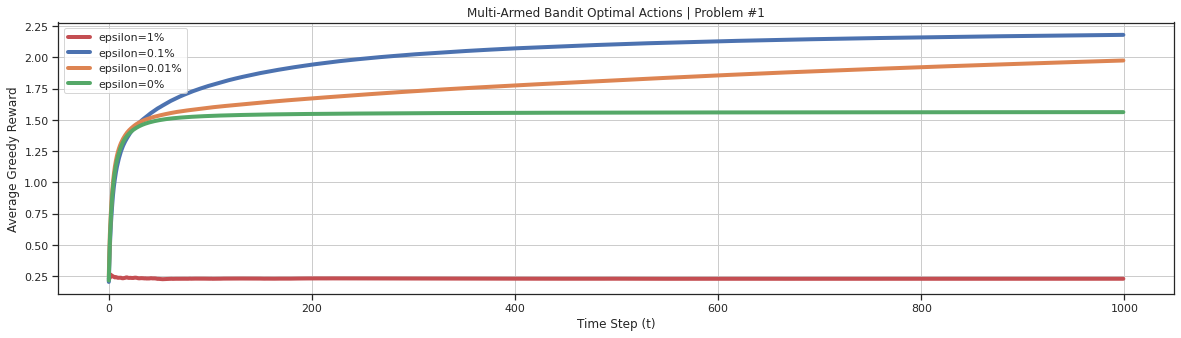

In [69]:
# Part 1 Plot Optimal actions
sns.set(style="ticks")
plt.rcParams["figure.figsize"] = (20,5)
plt.plot(e_avg_1,  label='epsilon=1%', linewidth = '4', c='r')
plt.plot(e_avg_01, label='epsilon=0.1%', linewidth = '4')
plt.plot(e_avg_001, label='epsilon=0.01%', linewidth = '4')
plt.plot(avg_rewards, label='epsilon=0%', linewidth = '4')
plt.title('Multi-Armed Bandit Optimal Actions | Problem #1')
plt.xlabel('Time Step (t)')
plt.ylabel('Average Greedy Reward')
plt.grid() 
plt.legend()
plt.show()

## **Part 1: Results & Analysis**

- ϵ=1 results in the smallest possible reward from a pure random agent that produces a relatively constant reward level overall
- ϵ=0.1 results Achieves a faster convergence, but only earns the second best overall average reward
- ϵ=0.01 results consists of a slower convergence but highest average reward
- ϵ=0 produces the lowest average reward by exploiting without any exploration



----

# **Part 2**

> - Using the algorithm in part 1, apply it to the Ad dataset and with the full reward distribution to determine the optimal frequency of ad selection.
-  Provide the maximum reward you can achieve with this dataset, and what is the best ad from the 
algorithm. 

### **Algorithm 2**

The kArmedBandit_2 Algorithm takes the Ad reward values for each given action A, returns R from the normal reward distribution of A, and then updates N and Q values according to the normal reward distribution with mean q*(a).

In [70]:
# Generate reward values from Ad data
def reward_values(A):
  reward = np.empty(10)
  for i in range(0, 10):    
    reward[i]=df['Ad '+str(i+1)].sum()
    return A

In [71]:
def kArmedBandit_2(itter, step_t, e_greedy): 
  
    Matrix_R = np.zeros((itter, step_t))  # Initilize empty reward matrix
    
    for i in range(0, itter):                
        for a in range(0, 10): # Initialize 0 to 10 reset
            Q[a]=0 # Initialze Q array to 0
            N[a]=0 # Initialze N array to 0
        sum_R = 0  # Initialze sum of reward variable to 0
        for j in range(0, step_t):            
            n = random.random()  # Return the next random number in range
            if n < 1 - e_greedy: # Exploit data with probability 1 - e_greedy
                A=np.random.choice(np.flatnonzero(Q == Q.max())) # Random sample of Q-Max Array 
                R=reward_values(A) # Expected reward values array
                N[A] +=1 # Update array N(A) <-- N(A)-1
                Q[A] += 1/N[A]*(R-Q[A]) # Action value             
                sum_R += Q[A] # Sum of action value rewards             
                Matrix_R[i][j]=sum_R/(j+1) # Average reward values matrix           
            else: # Explore data randomly with epsilon
                A=np.random.randint(0, 10)  # randome Action value              
                R=reward_values(A) # Expected reward values array
                N[A] +=1 # Update array N(A) <-- N(A)-1
                Q[A] += 1/N[A]*(R-Q[A]) # Action value             
                sum_R += Q[A] # Sum of action value rewards             
                Matrix_R[i][j]=sum_R/(j+1) # Average reward values matrix
    return Matrix_R

In [72]:
# Compare the trajectories of \epsilon =0.1 and \epsilon=0.01 over time. 
e_1 =  kArmedBandit_2(i, s, 1)
e_01 = kArmedBandit_2(i, s, 0.1)
e_001 = kArmedBandit_2(i, s, 0.01)
e_reward = kArmedBandit_2(i, s, 0)

In [73]:
# Average results of compared epsilon trajectories
e_avg_1 = np.mean(e_1, axis=0)
e_avg_01= np.mean(e_01, axis=0)
e_avg_001 =np.mean(e_001, axis=0)
avg_rewards =np.mean(e_reward, axis=0)

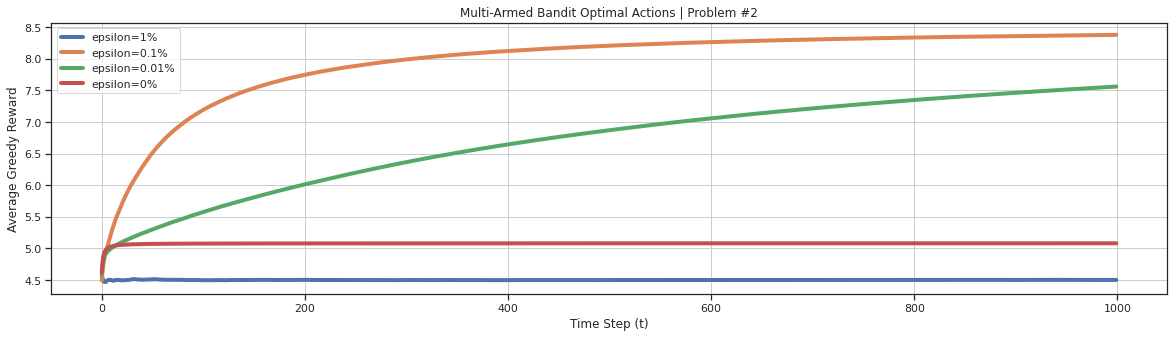

In [97]:
# Part 2 Plot Optimal actions
sns.set(style="ticks")
plt.rcParams["figure.figsize"] = (20,5)
plt.plot(e_avg_1, label='epsilon=1%', linewidth = '4')
plt.plot(e_avg_01, label='epsilon=0.1%', linewidth = '4')
plt.plot(e_avg_001, label='epsilon=0.01%', linewidth = '4')
plt.plot(avg_rewards, label='epsilon=0%', linewidth = '4')
plt.title('Multi-Armed Bandit Optimal Actions | Problem #2')
plt.xlabel('Time Step (t)')
plt.ylabel('Average Greedy Reward')
plt.grid() 
plt.legend()
plt.show()

## **Part 2: Final Results & Analysis**

- ϵ=1 results in the smallest possible reward from a pure random agent that produces the lowest average reward.
- ϵ=0.1 results consist of  a slower  convergence,and  best overall average reward.
- ϵ=0.01 results consists of a median convergence with the 2nd highest  average reward
- ϵ=0 produces the 2nd lowest average reward by exploiting without any exploration


----

# **Data with UCB**
This instance implements the add data set with UCB algorithm. I wrote this code to practice and compare.

In [88]:
import math
N = 10000 # itterations
d = 10 # reset value
ads_selected = [] # Return Ads selected array
n = [0] * d # Number of Selections
sum_R = [0] * d # Sum of rewards
total_reward = 0 # Total rewards
for n in range(0, N):
  ad = 0
  max_UB = 0
  for i in range(0, d):
    if (n[i] > 0):
      reward_avg = sum_R[i] / n[i]
      delta_i = math.sqrt(3/2 * math.log(n + 1) / n[i])
      UB = reward_avg + delta_i
    else:
      UB = 1e400 # Upper-bound 
    if (UB > max_UB):
      max_UB = UB
      ad = i
  ads_selected.append(ad)
  n[ad] = n[ad] + 1
  reward = df.values[n, ad]
  sum_R[ad] = sum_R[ad] + reward
  total_reward = total_reward + reward

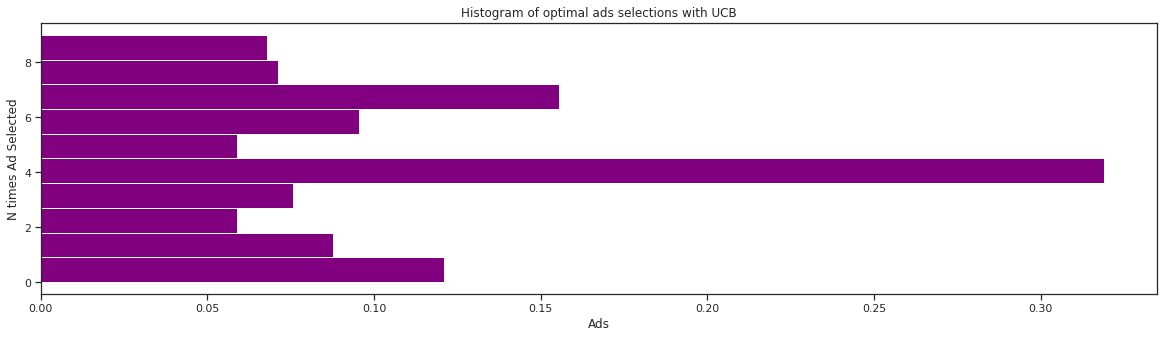

In [96]:
# UCB algorithm plot
sns.set(style="ticks")
plt.rcParams["figure.figsize"] = (20,5)
plt.hist(ads_selected, orientation='horizontal',color = "purple", density=True)
plt.title('Histogram of optimal ads selections with UCB')
plt.xlabel('Ads')
plt.ylabel('N times Ad Selected')
plt.show()

## **UCB Results:**
UCB implemntation shows at 10000 itterations the optimal retun action value selection through number of 4 ads selected with the highest freuncy for the ad over 30% ad selection.

----

# **Final Project Report & Analysis**

### **Implmentation Overview:**

In each experiment,the algorithms were initializing the q-values of all actions to 0. Some actions have negative expected values within the first datasetq*(a). In the second implmentation all actions have positive reward values.


### **Analysis Comparison**

- **ϵ=1** - The two algorithms implemented random actions over all timesteps (t). Compared to the epsilon greedy parameters, both implementations showed the lowest average reward. These algorithms show that performance is better than the greedy approach. 

- **ϵ=0.1** - Over all timesteps (t), both algorithms implemented random actions with a 10% probability of exploration. The results of each algorithm implementation showed the most positive returns. Additionally, the optimal action of algorithm 1 is action 3, while the optimal action of algorithm 2 is action 5. During the rest of the experiment, the agent will take the selected action 90% of the time, which leads to convergent behavior at those selected points.

- **ϵ=0.01** - The implementations of algorithm 1 and algorithm 2 are both run at 1% probability of exploration, which is known to take longer to find the optimal action. As soon as it is discovered, it will be taken in 99% of cases, and eventually be superior to the 10% exploratory approach in the long run.

- **ϵ=0** -  
According to algorithm 1, it will randomly select actions until it finds one with a positive q-value, and algorithm 2 will run until it finds one with a nonzero q-value. Both implementations are greedy, and the averaging rewards results indicate that smaller nonzero epsilon values produce the best long-term rewards


### **Conclusion or Results:**

- Generally, we find that ϵ=0.1 proves more difficult to reach convergence, but results in the highest average returns.
- The speed of convergence will decrease as epsilon values decrease, but they are guaranteed to take the optimal action more in the long run.
- There is a lower average reward for lower epsilon values in both experiments
Greedy approaches are only useful when they are expected to reward each action (positively or negatively).
- In the short term, greedy approaches will lead to convergent results, but are not guaranteed to generate the optimal outcome.


# **Print Report PDF**

In [59]:
# Generate PDF and build report
# from google.colab import drive
# drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# !apt-get install texlive-xetex texlive-fonts-recommended texlive-generic-recommended

In [ ]:
# !jupyter nbconvert --to pdf '/content/drive/MyDrive/Colab Notebooks/Shaun_Pritchard_Problem1_CAP6629_RL.ipynb'